In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%run Functions.ipynb
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

file_path = "insurance.csv"
df = pd.read_csv(file_path)

<h1>1. About the data </h1>

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<ul>
<li><b>age:</b> The age of the insured person</li>
<li><b>sex:</b> The sex of the insured person</li>
<li><b>bmi:</b> The body mass index (BMI) of the insured person, a measure of weight relative to height.</li> 
$$
BMI = \frac{\text{weight}}{\text{height}^2}
$$
<li><b>children:</b> The number of dependent children covered under the insured person's policy</li>
<li><b>smoker:</b> Whether the insured person is a smoker</li>
<li><b>region:</b> 	The geographic region where the insured person resides</li>
<li><b>charges:</b> The total medical charges incurred by the insured person during a specific period</li>
</ul>

<h1>2. Objective </h1>

<ul>
<li>Identify the key factors influencing insurance charges through feature analysis and selection techniques</li>
<li>Compare and evaluate different linear algorithms to determine the best model for accurate predictions.</li>
<li>Achieve a 80% prediction accuracy while maintaining model interpretability.</li> 
<li>Investigate the impact of individual features on predicted charges to assess model fairness and explainability.</li>
</ul>

In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

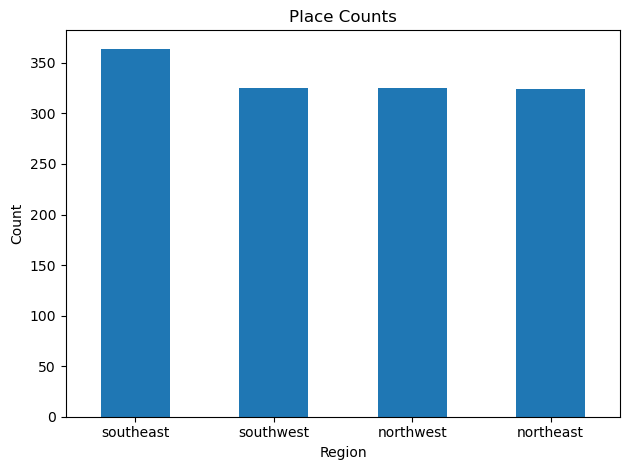

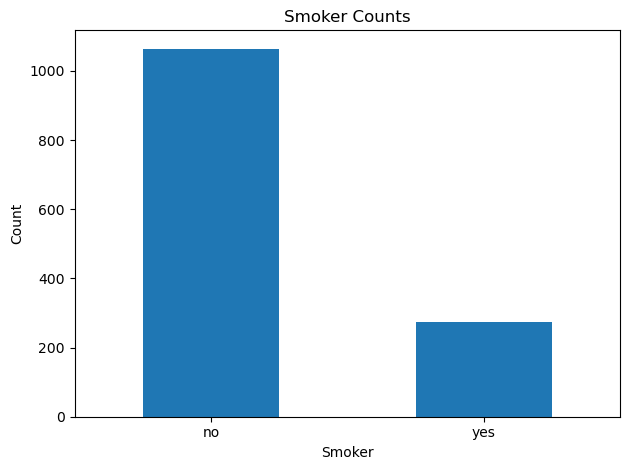

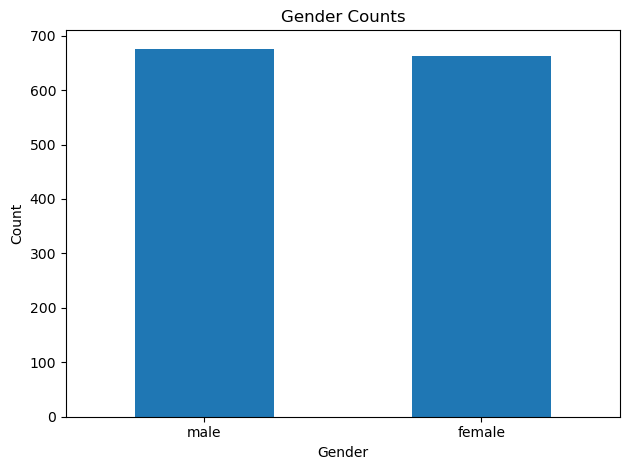

In [5]:
visualized_count(column = 'region', x = 'Region', y= 'Count', title = "Place Counts")
visualized_count(column = 'smoker', x = 'Smoker', y= 'Count', title = "Smoker Counts")
visualized_count(column = 'sex', x = 'Gender', y= 'Count', title = "Gender Counts")

In [6]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

In [7]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [8]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_data = pd.DataFrame(normalized_data, columns = df.columns)
normalized_data

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,0.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.666667,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.666667,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.666667,0.151299
1334,0.000000,0.0,0.429379,0.0,0.0,1.000000,0.017305
1335,0.000000,0.0,0.562012,0.0,0.0,0.333333,0.008108
1336,0.065217,0.0,0.264730,0.0,0.0,0.000000,0.014144


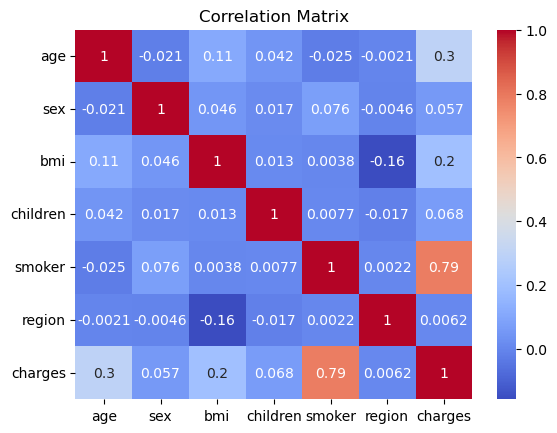

In [9]:
correlation_matrix = normalized_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

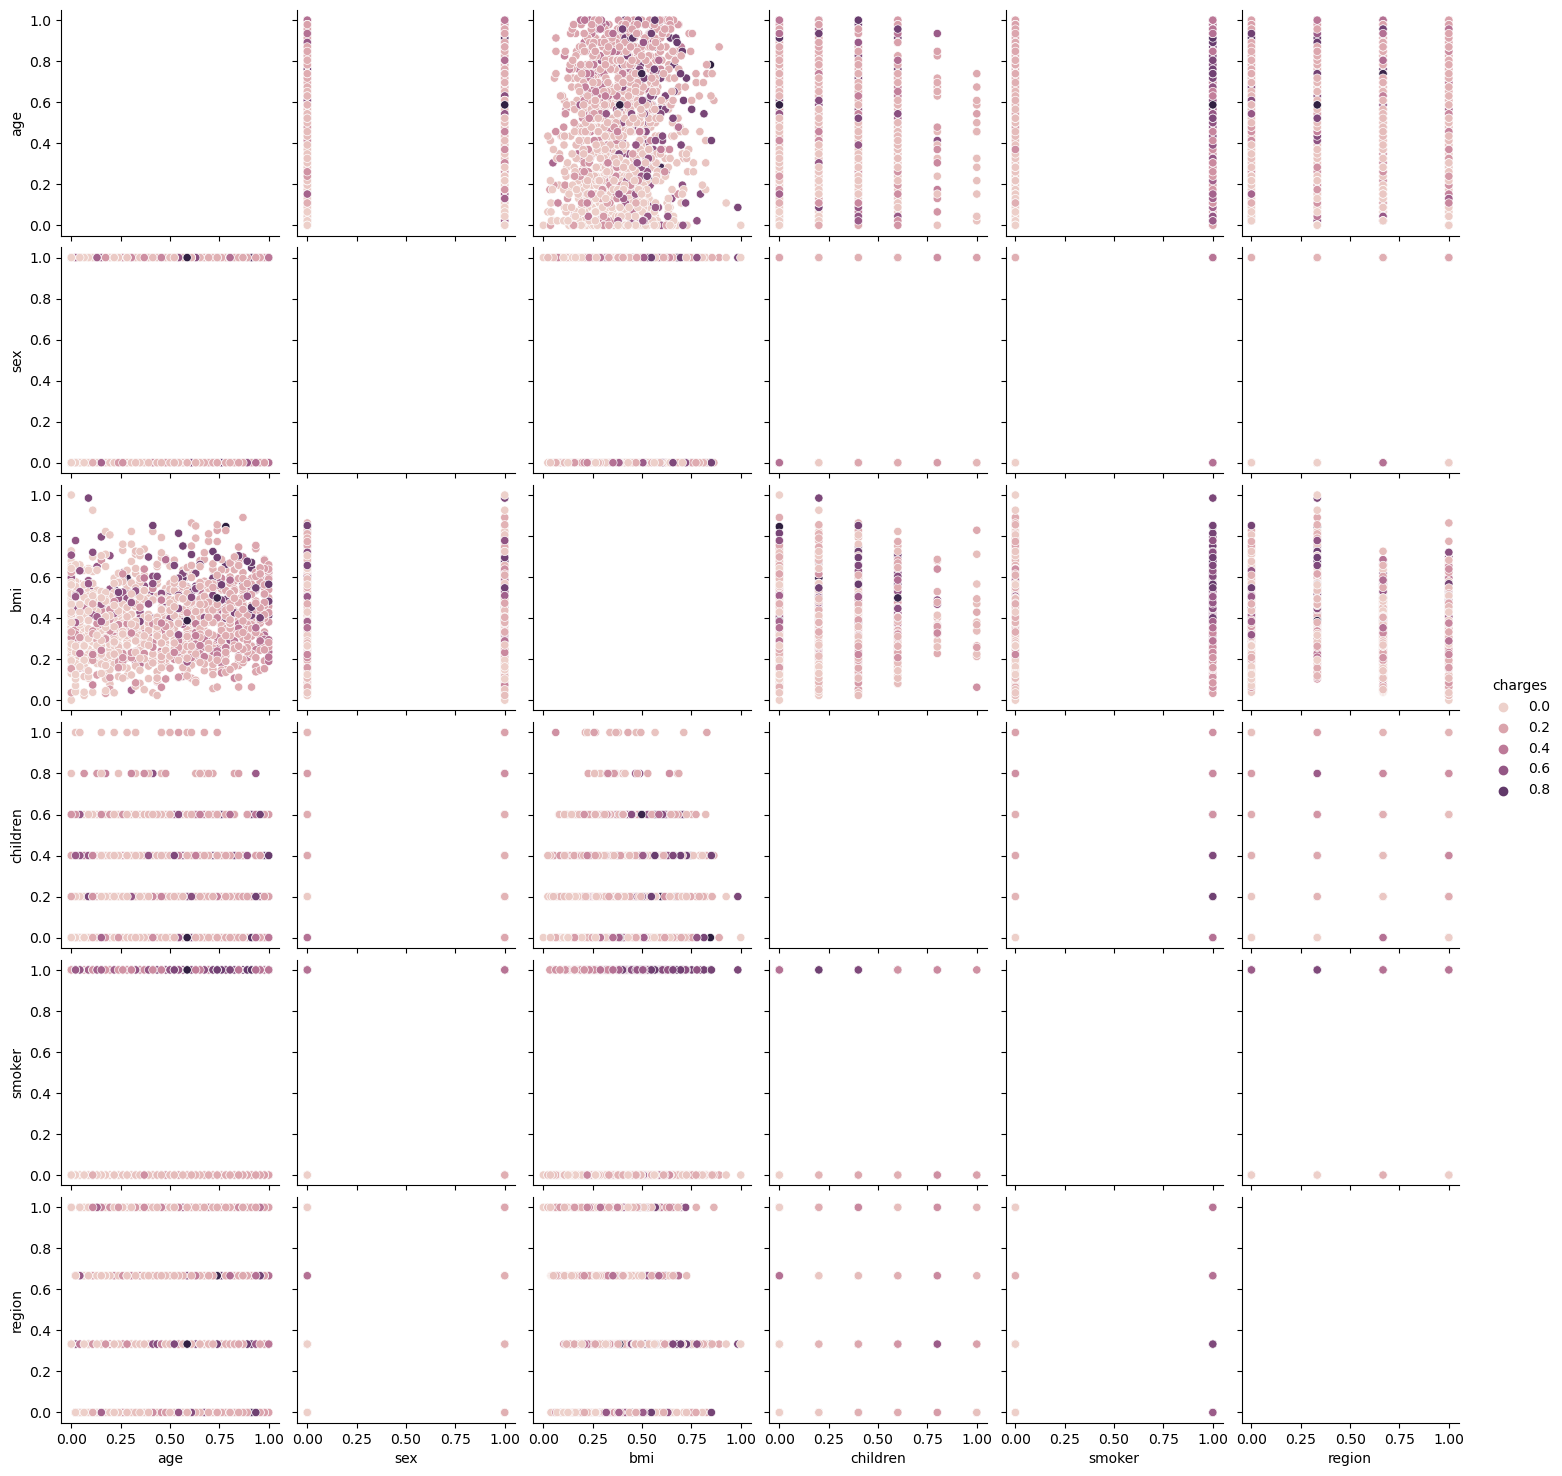

In [10]:
target_column = "charges"

sns.pairplot(normalized_data, vars=normalized_data.columns[normalized_data.columns != target_column], hue=target_column)
plt.show()

<h1>3. Linear regression model </h1>

<h4> Train test split</h4>

In [11]:
X = normalized_data[normalized_data.columns[normalized_data.columns != target_column]]
y = normalized_data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h4> A. Simple linear regression model </h4>

In [12]:
print(LinearRegressionModel(X_train, y_train, X_test, y_test))

0.7655428187978897


<h4> B. Polynomial linear regression model </h4>

In [17]:
print(PolynomialRegressionModel(X_train, y_train, X_test, y_test))

0.8553237671670588


<h4> C. Regularized linear regression model </h4>

In [14]:
print(RidgeRegressionModel(X_train, y_train, X_test, y_test))

0.7658460547323367


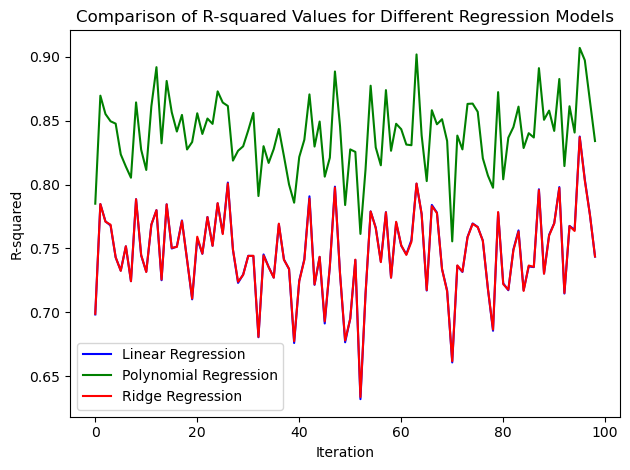

In [41]:
LinearRegressionModel_R2List = []
PolynomialRegressionModel_R2List = []
RidgeRegressionModel_R2List = []

for i in range (1,100):
    X = normalized_data[normalized_data.columns[normalized_data.columns != target_column]]
    y = normalized_data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    LinearRegressionModel_R2List.append(LinearRegressionModel(X_train, y_train, X_test, y_test))
    PolynomialRegressionModel_R2List.append(PolynomialRegressionModel(X_train, y_train, X_test, y_test))
    RidgeRegressionModel_R2List.append(RidgeRegressionModel(X_train, y_train, X_test, y_test))
    
fig, ax = plt.subplots()

ax.plot(LinearRegressionModel_R2List, label='Linear Regression', color='blue')
ax.plot(PolynomialRegressionModel_R2List, label='Polynomial Regression', color='green')
ax.plot(RidgeRegressionModel_R2List, label='Ridge Regression', color='red')

ax.set_xlabel('Iteration')
ax.set_ylabel('R-squared')
ax.set_title('Comparison of R-squared Values for Different Regression Models')
ax.legend()

plt.tight_layout()

plt.show()